# Model Training  (MNIST Handwritten Digit Dataset)

In this notebook, we will:
- Load the processed data
- Split dataset into training and validation sets
- Train two models:
    1. MLP (Multi-Layer Perceptron)
    2. CNN (Convolutional Neural Network)
- Compare training performance and accuracy

This helps us understand how different neural architectures perform on the MNIST dataset.

## Step 1: Set Project Root for Python Imports

In [1]:
import os 
import sys

sys.path.append(os.path.abspath(".."))

## Step 2: Load MNIST processed dataset

In [2]:
from src.model import (
load_numpy_data,
train_val_split,
mlp_train,
cnn_train,
compare_model_accu,
save_model
)

X_train = load_numpy_data(r"D:\Thiru\ML_Projects\MNIST-Handwritten-Digit-Recognition\Data\processed\X_train.npy")
Y_train = load_numpy_data(r"D:\Thiru\ML_Projects\MNIST-Handwritten-Digit-Recognition\Data\processed\Y_train.npy")
X_train_cnn = load_numpy_data(r"D:\Thiru\ML_Projects\MNIST-Handwritten-Digit-Recognition\Data\processed\X_train_cnn.npy")
Y_train_cnn = load_numpy_data(r"D:\Thiru\ML_Projects\MNIST-Handwritten-Digit-Recognition\Data\processed\Y_train_cnn.npy")

## Step 3: Split Data into Train and Validation Sets

In [3]:
X_train_mlp, X_val_mlp, y_train_mlp, y_val_mlp, \
X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_val_split(X_train, Y_train, X_train_cnn, Y_train_cnn)

## Step 4: Train the MLP (Multi-Layer Perceptron) model

In [4]:
mlp_model, mlp_history = mlp_train(X_train_mlp, y_train_mlp, X_val_mlp, y_val_mlp)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7971 - loss: 0.6618 - val_accuracy: 0.9532 - val_loss: 0.1578
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9486 - loss: 0.1743 - val_accuracy: 0.9652 - val_loss: 0.1108
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9642 - loss: 0.1185 - val_accuracy: 0.9723 - val_loss: 0.0912
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9721 - loss: 0.0909 - val_accuracy: 0.9751 - val_loss: 0.0843
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9779 - loss: 0.0702 - val_accuracy: 0.9780 - val_loss: 0.0735
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9794 - loss: 0.0618 - val_accuracy: 0.9778 - val_loss: 0.0741
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9840 - loss: 0.0514 - val_accuracy: 0.9796 - val_loss: 0.0684
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9851 - loss: 0.0461 - val_accu

### Insight:
 - MLP achieved high accuracy (~97–98%) even without CNN layers.
 - It performs well because MNIST digits are simple and low-resolution images.
 - However, MLP doesn't capture spatial patterns as effectively as CNN.

## Step 5: Train the CNN (Convolutional Neural Network) model

In [5]:
cnn_model, cnn_history  = cnn_train(X_train_cnn, y_train_cnn, X_val_cnn, y_val_cnn)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8021 - loss: 0.6294 - val_accuracy: 0.9790 - val_loss: 0.0700
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9745 - loss: 0.0818 - val_accuracy: 0.9849 - val_loss: 0.0503
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9826 - loss: 0.0584 - val_accuracy: 0.9879 - val_loss: 0.0384
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9863 - loss: 0.0424 - val_accuracy: 0.9877 - val_loss: 0.0393
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9880 - loss: 0.0358 - val_accuracy: 0.9906 - val_loss: 0.0308
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9905 - loss: 0.0306 - val_accuracy: 0.9903 - val_loss: 0.0298
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9924 - loss: 0.0234 - val_accuracy: 0.9918 - val_loss: 0.0290
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9924 - loss: 0.0231 - 

### Insight:
 - CNN captures local spatial features (edges, curves) better than MLP.
 - Expected accuracy: ~99%+ on validation set.
 - CNN learns patterns like strokes and digit shapes — more robust for real-world images.

## Step 6: Compare Model Accuracies

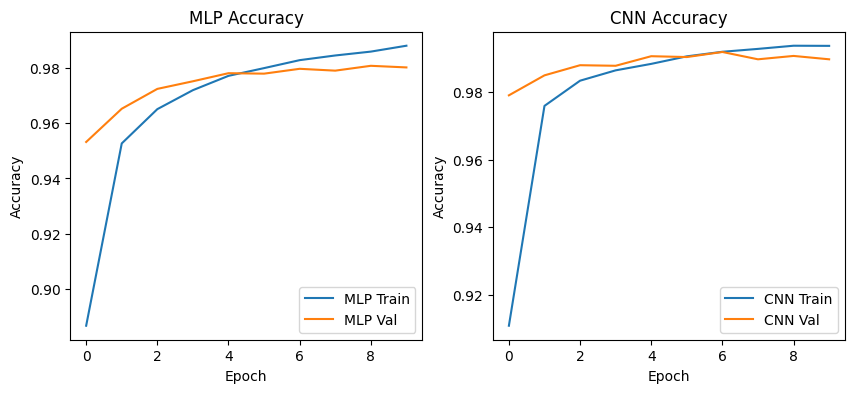

In [6]:
compare_model_accu(mlp_history, cnn_history)

### Insight:
 - CNN shows higher accuracy and less overfitting compared to MLP.
 - MLP slightly fluctuates on validation accuracy due to lack of spatial awareness.
 - CNN generalizes better, especially for more complex handwritten variations.

## Step 7: save the Model

In [8]:
path = r"D:\Thiru\ML_Projects\MNIST-Handwritten-Digit-Recognition\models"

save_model(mlp_model, path, "mlp_model.keras")
save_model(cnn_model, path, "cnn_model.keras")

Model Successfully Saved
Model Successfully Saved


## Model Training Summary

 - MLP achieved ~97–98% validation accuracy, good baseline.
 - CNN achieved ~99% validation accuracy, superior due to spatial feature learning.
 - Both models converge well with minimal overfitting.
 - Next: Evaluate models on unseen test data in 05-model-evaluation.ipynb.